## Scipy.stats ANOVA

In [26]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import numpy as np
import collections as co
import scipy.special as spec

In [10]:
df = pd.read_csv('rat_weight_gain.csv')
df

,Weight gain,diet amount,diet type
0,118,1,Type1
1,117,1,Type1
2,111,1,Type1
3,107,1,Type1
4,104,1,Type1
5,102,1,Type1
6,100,1,Type1
7,87,1,Type1
8,81,1,Type1
9,73,1,Type1


### Assumption 1: Depdent variable

In [11]:
dependent = df['Weight gain']
dependent

0     118
1     117
2     111
3     107
4     104
5     102
6     100
7      87
8      81
9      73
10    120
11    108
12    105
13    102
14    102
15     98
16     96
17     94
18     91
19     79
20    111
21     98
22     95
23     92
24     88
25     86
26     82
27     77
28     74
29     56
30     95
31     90
32     90
33     90
34     86
35     78
36     76
37     72
38     64
39     51
40    106
41     97
42     86
43     82
44     82
45     81
46     73
47     70
48     61
49     49
50    107
51     98
52     97
53     95
54     89
55     80
56     74
57     74
58     67
59     58
Name: Weight gain, dtype: int64

In [12]:
dependent.describe()

count     60.000000
mean      87.866667
std       16.569798
min       49.000000
25%       76.750000
50%       89.500000
75%       98.500000
max      120.000000
Name: Weight gain, dtype: float64

### Assumption 2: Independent variable

In [13]:
independent = df['diet type']
independent

0     Type1
1     Type1
2     Type1
3     Type1
4     Type1
5     Type1
6     Type1
7     Type1
8     Type1
9     Type1
10    Type2
11    Type2
12    Type2
13    Type2
14    Type2
15    Type2
16    Type2
17    Type2
18    Type2
19    Type2
20    Type3
21    Type3
22    Type3
23    Type3
24    Type3
25    Type3
26    Type3
27    Type3
28    Type3
29    Type3
30    Type1
31    Type1
32    Type1
33    Type1
34    Type1
35    Type1
36    Type1
37    Type1
38    Type1
39    Type1
40    Type2
41    Type2
42    Type2
43    Type2
44    Type2
45    Type2
46    Type2
47    Type2
48    Type2
49    Type2
50    Type3
51    Type3
52    Type3
53    Type3
54    Type3
55    Type3
56    Type3
57    Type3
58    Type3
59    Type3
Name: diet type, dtype: object

### Assumption 4: Outliers

<AxesSubplot:xlabel='Weight gain', ylabel='diet type'>

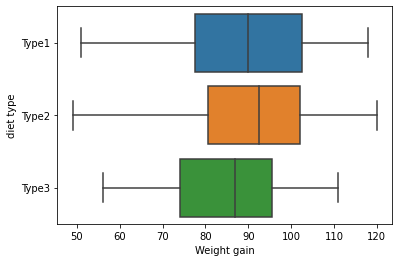

In [14]:
sns.boxplot(x = dependent, y = independent)

### Assumption 5: Normality

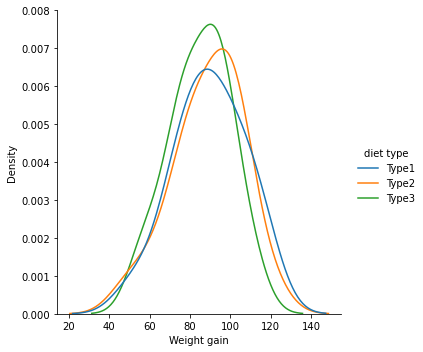

In [16]:
sns.displot(x = dependent, hue = independent, kind = "kde")

In [18]:
type_1_gain = dependent[independent == 'Type1']
type_1_gain

0     118
1     117
2     111
3     107
4     104
5     102
6     100
7      87
8      81
9      73
30     95
31     90
32     90
33     90
34     86
35     78
36     76
37     72
38     64
39     51
Name: Weight gain, dtype: int64

In [19]:
ss.shapiro(type_1_gain)

ShapiroResult(statistic=0.9803934693336487, pvalue=0.9390798211097717)

In [20]:
ss.shapiro(dependent[independent == 'Type2'])

ShapiroResult(statistic=0.9722667336463928, pvalue=0.8018485903739929)

In [21]:
ss.shapiro(dependent[independent == 'Type3'])

ShapiroResult(statistic=0.9713431596755981, pvalue=0.7829576134681702)

### Assumption 6: homogeneity of variances

In [22]:
ss.levene(
    dependent[independent == 'Type1'],
    dependent[independent == 'Type2'],
    dependent[independent == 'Type3'])

LeveneResult(statistic=0.1799729364005414, pvalue=0.8357656173211195)

---

## One-way ANOVA

In [23]:
ss.f_oneway(
    dependent[independent == 'Type1'],
    dependent[independent == 'Type2'],
    dependent[independent == 'Type3']
)

F_onewayResult(statistic=0.47677688232783505, pvalue=0.6232342640383861)

---

In [24]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [25]:
welch_anova_np(
    dependent[independent == 'Type1'],
    dependent[independent == 'Type2'],
    dependent[independent == 'Type3']
)

F_onewayResult(statistic=0.5172504093761462, pvalue=0.6003186623381341)

---

## Statsmodels